# 我的班級/學號/姓名

資工碩一甲/BBB113023/陳寅

In [57]:
# 引入函式庫
# pandas用於資料處理與操作的函式庫
# train_test_split：將資料分成訓練集與驗證集可訓練和評估模型效能，
# GridSearchCV：用於模型超參數調整，透過網格搜尋尋找最佳的參數組合，提升模型準確度。
# RandomForestClassifier：隨機森林分類器用於分類問題，透過建立多棵決策樹並投票決定最終預測結果。
# accuracy_score：用於計算模型預測的準確度
# classification_report：顯示分類的詳細報告，包括 precision、F1-score 等。
# LabelEncoder：用於將類別型變量轉換為數值型編碼。
# StandardScaler：將數值特徵進行標準化，使資料符合標準常態分佈，均值為 0，標準差為 1。
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [58]:
# 讀取資料
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Testset.csv')

In [59]:
# 提取測試集的 ID 欄位
test_ids = test_df['ID']

In [60]:
# 定義需要數值化的類別型欄位
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1', 'Spending_Score']


<Axes: xlabel='ID', ylabel='Segmentation'>

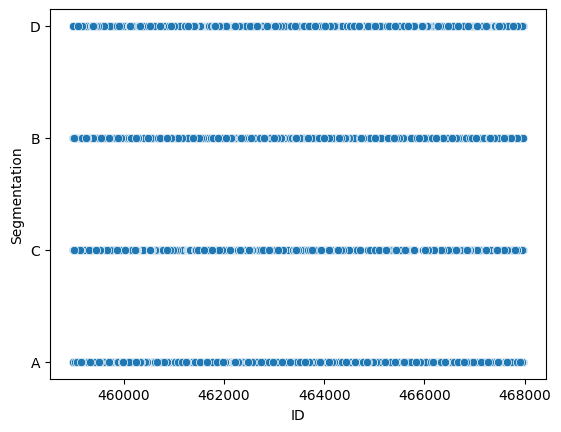

In [61]:
import seaborn as sns
sns.scatterplot(x=train_df.ID,y=train_df.Segmentation)

In [62]:
# 建立字典以儲存每個欄位的 LabelEncoder 物件
label_encoders = {}

In [63]:
# 將類別型欄位轉換為數值，並對訓練集和測試集使用相同的編碼
for col in categorical_cols:
    encoder = LabelEncoder()
    train_df[col] = encoder.fit_transform(train_df[col].astype(str))# 訓練集轉換
    test_df[col] = encoder.transform(test_df[col].astype(str))   # 測試集轉換
    label_encoders[col] = encoder                  # 儲存編碼器

In [64]:
# 檢查是否有未處理的類別型欄位
for col in train_df.select_dtypes(include=['object']).columns:
    if col not in categorical_cols:
        print(f"未處理的類別型欄位: {col}")# 列出未處理的欄位名稱

未處理的類別型欄位: Segmentation


In [65]:
# 分離目標變量與特徵
y = train_df['Segmentation'] # 目標變量
X = train_df.drop(columns=['ID', 'Segmentation'])  # 特徵變量，並去除 ID 和目標變量。
test_features = test_df.drop(columns=['ID'])     # 測試集的特徵變量，並去除 ID。

In [66]:
# 標準化數值特徵
scaler = StandardScaler() # 初始化
X_scaled = scaler.fit_transform(X) # 對訓練數據進行標準化
test_scaled = scaler.transform(test_features) # 使用相同的標準化對測試數據進行標準化

In [67]:
# 將訓練資料分為訓練集和驗證集，30%用於驗證
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [68]:
# 設定 RandomForest 模型
rf_model = RandomForestClassifier(random_state=42)

In [69]:
# 使用GridSearchCV來尋找最佳參數 ,定義參數範圍並使用 GridSearchCV進行網格搜尋，以找到最佳模型參數
# n_estimators：設定樹的數量，這裡設 100 和 200 和 300 棵樹
# max_depth：樹的最大深度，值分別為 10, 20, 30
param_grid = {
    'n_estimators': [100, 200, 300],  # 決定隨機森林中樹的數量
    'max_depth': [10, 20, 30],       # 樹的最大深度範圍
    'min_samples_split': [2, 5, 10], # 節點最小分裂樣本數
    'min_samples_leaf': [1, 2, 4]   # 葉節點的最小樣本數
}


In [70]:
# estimator=rf_model:指定要調整的XGBoost模型
# param_grid=param_grid：將定義的param_grid提供給GridSearchCV進行參數組合測試。
# cv=2：設定交叉驗證次數為2，表示每組參數組合會被分成2折進行交叉驗證。
# scoring='accuracy'使用準確率作為評分標準來評估模型效果。
# verbose=1：設定詳細輸出，允許觀察搜尋過程的進度。
# n_jobs=-1：使用所有可用的CPU核心進行併行處理加快搜尋速度。
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=-1)

In [71]:
# 使用fit方法對訓練數據X_train,y_train進行網格搜索。這裡會嘗試所有可能的參數組合，並使用交叉驗證來評估每組參數組合的效果。
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [72]:
# 獲取超參數搜尋後的最佳模型
best_rf_model = grid_search.best_estimator_

In [73]:
# 在驗證資料集上進行預測
y_val_pred = best_rf_model.predict(X_val)

In [74]:
# 計算驗證資料集的準確率
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")  # 輸出驗證準確率

Validation Accuracy: 0.5285


In [75]:
# 顯示分類報告，包括精確率、召回率和 F1 分數
print("Classification Report:\n", classification_report(y_val, y_val_pred))

Classification Report:
               precision    recall  f1-score   support

           A       0.46      0.46      0.46       487
           B       0.41      0.33      0.37       457
           C       0.57      0.57      0.57       508
           D       0.62      0.71      0.66       548

    accuracy                           0.53      2000
   macro avg       0.51      0.52      0.52      2000
weighted avg       0.52      0.53      0.52      2000



In [76]:
# 使用最佳模型對測試集進行預測
test_predictions = best_rf_model.predict(test_scaled)

In [77]:
# 將預測結果保存為 CSV 檔案，以便於提交
output_df = pd.DataFrame({'ID': test_ids, 'Segmentation': test_predictions})
output_df.to_csv('submission.csv', index=False)
print("Test predictions saved to 'submission.csv'.")  # 提示檔案已儲存

Test predictions saved to 'submission.csv'.


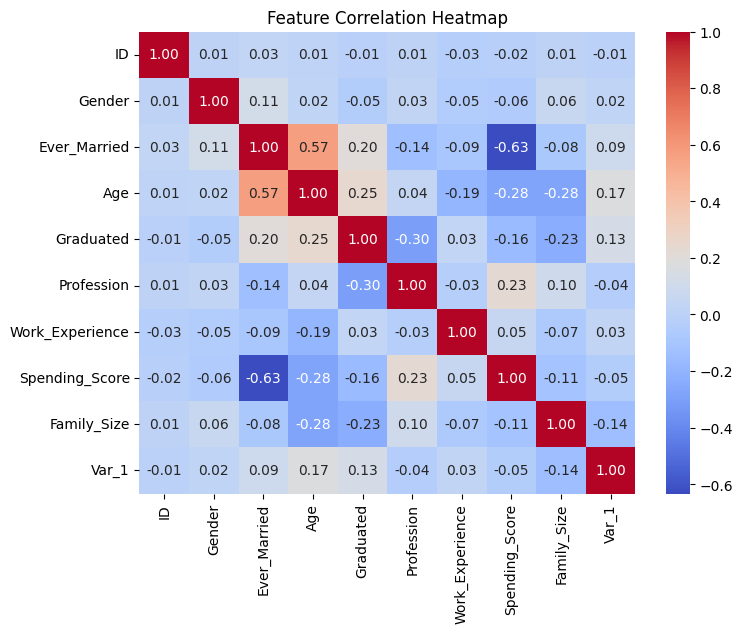

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 篩選出數值型欄位
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# 計算數值型欄位的相關性矩陣
correlation_matrix = train_df[numeric_cols].corr()

# 繪製熱力圖
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()


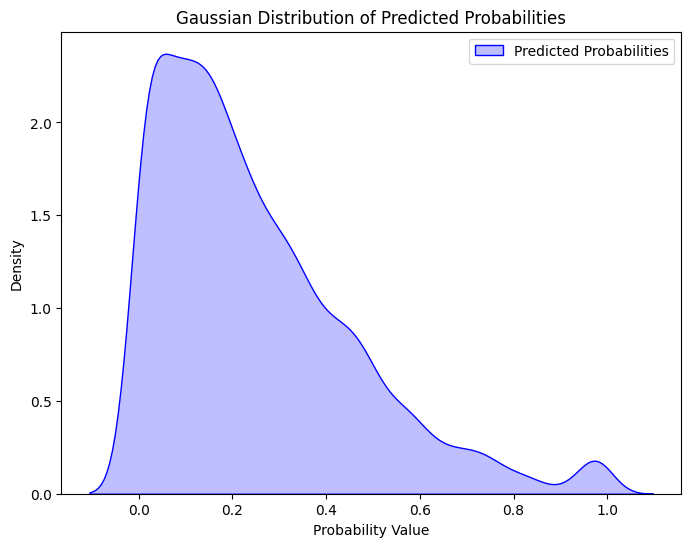

In [79]:
# 繪製高斯分布圖，以驗證集的預測值分布為例

# 計算驗證集預測的分布
y_val_pred_proba = best_rf_model.predict_proba(X_val)
y_val_pred_proba_flat = y_val_pred_proba.flatten()

# 繪製高斯分布圖
plt.figure(figsize=(8, 6))
sns.kdeplot(y_val_pred_proba_flat, color='blue', fill=True, label="Predicted Probabilities")
plt.title("Gaussian Distribution of Predicted Probabilities")
plt.xlabel("Probability Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# 這段程式碼展示了一個完整的機器學習分類任務流程，第一步，使用pandas讀取訓練和測試資料，並處理類別型欄位（如性別），再將文字資料轉換為數字格式。接著，對數值特徵進行標準化處理，然後將訓練資料分割為訓練集與驗證集。接下來，使用隨機森林模型進行訓練，並透過GridSearchCV自動調整超參數以尋找最佳模型參數組合，此模型雖然會執行必較久(約兩分鐘)，但她可以輸出更好的驗證值。在模型訓練完成後，使用驗證資料計算準確率，並輸出詳細的分類報告。最後，利用最佳模型對測試集進行預測，將預測結果輸出為CSV檔案。